[Reference: theoretical ecology / A simple Metropolis-Hastings MCMC in R](https://theoreticalecology.wordpress.com/2010/09/17/metropolis-hastings-mcmc-in-r/)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 4.3, 3.4

# Create Data Set

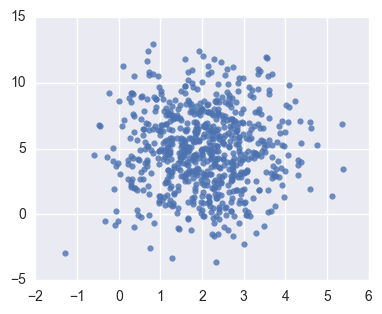

In [4]:
y1 = 2 ; y2=5 ; c1=1; c2=10
data = np.random.multivariate_normal(mean=[y1,y2], cov=[[c1, 0], [0, c2]], size=700)
sns.regplot(x=data[: , 0], y=data[: , 1], fit_reg=False)

# Define Statistical Model

In [5]:
def likelihood(param): # Wikipedia 
    def calc_loglikelihood(residual):
        return -0.5 * (np.log(np.linalg.det(cov1)) + residual.T.dot(np.linalg.inv(cov1)).dot(residual) + 2 * np.log(2 * np.pi))
    
    # mean = np.array([y1, y2]), cov = np.array([[c1, 0], [0, c2]])
    mean1 = np.array([param[0][0], param[0][1]])
    cov1 = np.array([[param[0][2], 0], [0, param[0][3]]])
    residuals = (data - mean1)


    loglikelihood = np.apply_along_axis(calc_loglikelihood, 1, residuals)
    loglikelihoodsum = loglikelihood.sum()

    return loglikelihoodsum

# Define Next

次に移動した点での $P^*(X)$　に相当するものを考える。<br>
京大の資料に従って、一つずつパラメータを動かす

In [6]:
def next_param(param, param_index):
    # mean = np.array([y1, y2]), cov = np.array([[c1, 0], [0, c2]])
    y1_next = param[0][0] ; y2_next = param[0][1] 
    c1_next = param[0][2] ; c2_next = param[0][3] 
    
    if param_index == 0:
        y1_next = param[0][0] + npr.normal(0,0.1)
    elif param_index == 1:
        y2_next = param[0][1] + npr.normal(0,0.1)
    elif param_index == 2:
        c1_next = param[0][2] + npr.normal(0,0.1)
    elif param_index == 3:
        c2_next = param[0][3] + npr.normal(0,0.1)
        
    return np.array([[y1_next, y2_next, c1_next, c2_next]])

In [7]:
def next_param2(param):
    # mean = np.array([y1, y2]), cov = np.array([[c1, 0], [0, c2]])

    y1_next = param[0][0] + npr.normal(0,0.1)
    y2_next = param[0][1] + npr.normal(0,0.1)
    c1_next = param[0][2] + npr.normal(0,0.1)
    c2_next = param[0][3] + npr.normal(0,0.1)

    return np.array([[y1_next, y2_next, c1_next, c2_next]])

# MCMC

mean = np.array([y1, y2]), cov = np.array([[c1, 0], [0, c2]])

In [8]:
num_sampling = 250
chain = np.zeros((num_sampling, 1, 4))
chain[0][0][0] = 3 # starting value for y1
chain[0][0][1] = 4 # starting value for y2
chain[0][0][2] = 2 # starting value for c1
chain[0][0][3] = 9 # starting value for c2

num_accepted = 0
for i in range(num_sampling-1):
    chain_previous = chain[i][:]
    
    proposal = next_param2(chain[i])

    probab = likelihood(proposal) - likelihood(chain_previous)
    #u = np.exp(npr.uniform(0, 1))
    if 0  < probab:
        chain[i+1] = proposal
        num_accepted += 1
    else:
        chain[i+1] = chain[i]

In [9]:
num_accepted

30

In [10]:
num_sampling = 1000
chain = np.zeros((num_sampling, 1, 4))
chain[0][0][0] = 5 # starting value for y1
chain[0][0][1] = 6 # starting value for y2
chain[0][0][2] = 3 # starting value for c1
chain[0][0][3] = 7 # starting value for c2

num_accepted = 0
for i in range(num_sampling-1):
    chain_previous = chain[i][:]
    chain_new = np.zeros((1, 1, 4))
    
    for p in range(4):
        proposal = next_param(chain_previous, p)
        
        probab = likelihood(proposal) - likelihood(chain_previous)
        u = np.log(npr.uniform(0, 1))
        if u < probab:
            chain_new[0][0][p] = proposal[0][p].copy()
            num_accepted += 1
        else:
            chain_new[0][0][p] = chain[i][0][p].copy()
            
    chain[i+1] = chain_new[0][:]

In [11]:
num_accepted

2608

# Show Results

In [12]:
show_num = int(np.rint(num_sampling * 0.9))

## y1

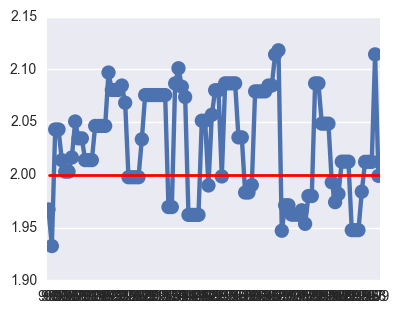

In [13]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=chain[show_num: , 0, 0])
plt.plot([0, num_sampling-show_num], [y1, y1], linewidth=2, color='red')

In [14]:
chain[show_num: , 0, 0].mean()

2.0289164406175741

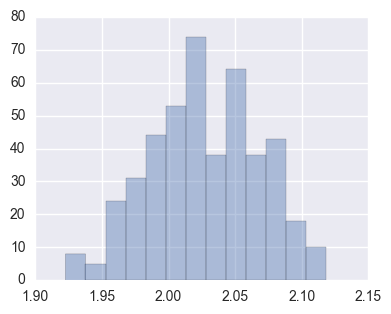

In [15]:
sns.distplot(chain[int(num_sampling * 0.55): , 0, 0], hist=True, kde=False)

## y2

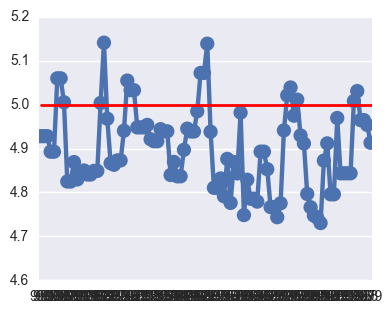

In [16]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=chain[show_num: , 0, 1])
plt.plot([0, num_sampling-show_num], [y2, y2], linewidth=2, color='red')

In [17]:
chain[show_num: , 0, 1].mean()

4.8982517302358346

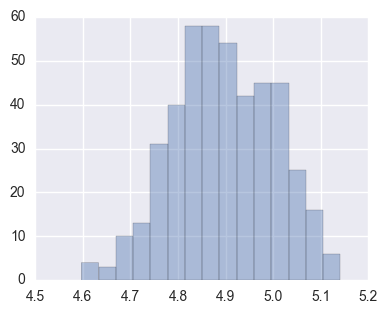

In [18]:
sns.distplot(chain[int(num_sampling * 0.55): , 0, 1], hist=True, kde=False)

## c1

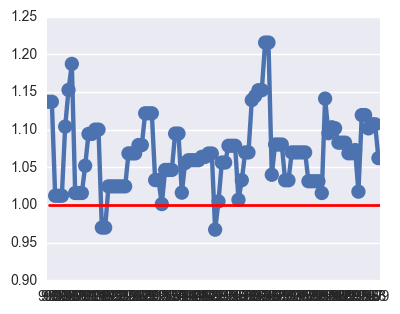

In [19]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=chain[show_num: , 0, 2])
plt.plot([0, num_sampling-show_num], [c1, c1], linewidth=2, color='red')

In [20]:
chain[show_num: , 0, 2].mean()

1.0692858784814339

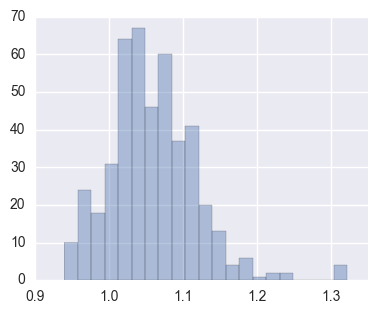

In [21]:
sns.distplot(chain[int(num_sampling * 0.55): , 0, 2], hist=True, kde=False)

## c2 

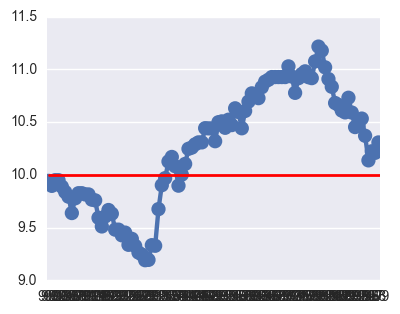

In [22]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=chain[show_num: , 0, 3])
plt.plot([0, num_sampling-show_num], [c2, c2], linewidth=2, color='red')

In [23]:
chain[show_num: , 0, 3].mean()

10.250994797290021

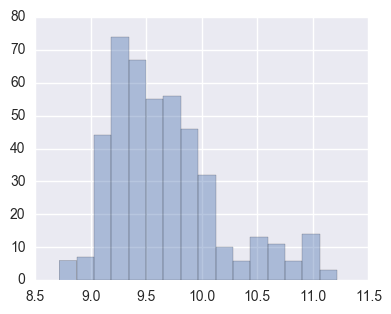

In [24]:
sns.distplot(chain[int(num_sampling * 0.55): , 0, 3], hist=True, kde=False)